<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Dheeraj_M01_L03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Augmentation

Module 1, Lab 3


In this lab, we will see how augmentation of data samples help in improving the machine learning performance. Augmentation is the process of creating new data samples by making reasonable modifications to the original data samples. This is particularly useful when the size of the training data is small. We will use the MNISt dataset for this lab. We will also reuse functions from the previous labs.

In [5]:
import matplotlib.pyplot as plt
import numpy as np # Import the numpy library
rng = np.random.default_rng() # Create a default random number generator object
img = rng.random((28, 28))
rotation_angle = rng.uniform(low=-30, high=30)


In [10]:
import numpy as np
# Import the mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[::600, :, :].copy() # Changed subsampling rate
train_y = train_y[::600].copy()
rng = np.random.default_rng(12345) # Added a seed for reproducibility
img = rng.random((28, 28))
rotation_angle = rng.uniform(low=-45, high=45) # Changed range of rotation

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



Let us borrow a few functions from the previous labs:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Import the mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[::600, :, :].copy() # Changed subsampling rate
train_y = train_y[::600].copy()
rng = np.random.default_rng(12345) # Added a seed for reproducibility
img = rng.random((28, 28))
rotation_angle = rng.uniform(low=-45, high=45) # Changed range of rotation


# The `accuracy` function seems to have been partially pasted or has incorrect indentation.
# Assuming the intention was to define an accuracy function, a correct implementation is provided below.
def accuracy(gtlabel, predlabel):
    """
    This function calculates the accuracy of a classifier.
    gtlabel: numpy array of shape (n,) where n is the number of samples (ground truth labels)
    predlabel: numpy array of shape (n,) where n is the number of samples (predicted labels)
    returns: the accuracy of the classifier which is the ratio of the number of correctly classified samples to the total number of samples
    """
    assert len(gtlabel) == len(predlabel), "Length of ground truth and predicted labels should be same"
    correct_samples = (gtlabel == predlabel).sum()
    accuracy = correct_samples / len(gtlabel)
    return accuracy

def plot_MNIST(samples, pred_lab):
    """
    This function plots the MNIST digits along with their predicted labels
    samples: numpy array of shape (n, 28, 28) where n is the number of samples
    pred_lab: numpy array of shape (n,) where n is the number of samples
    """
    for i in range(samples.shape[0]):
        plt.subplot(int(samples.shape[0]/10)+1, 10, i+1)
        plt.imshow(samples[i,:,:], cmap='gray')
        plt.title('%d' % pred_lab[i])
        plt.axis('off')
    plt.show()

In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time. Let us first check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Import the mnist dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[::600, :, :].copy() # Changed subsampling rate
train_y = train_y[::600].copy()
rng = np.random.default_rng(12345) # Added a seed for reproducibility
img = rng.random((28, 28))
rotation_angle = rng.uniform(low=-45, high=45) # Changed range of rotation


# The `accuracy` function seems to have been partially pasted or has incorrect indentation.
# Assuming the intention was to define an accuracy function, a correct implementation is provided below.
def accuracy(gtlabel, predlabel):
    """
    This function calculates the accuracy of a classifier.
    gtlabel: numpy array of shape (n,) where n is the number of samples (ground truth labels)
    predlabel: numpy array of shape (n,) where n is the number of samples (predicted labels)
    returns: the accuracy of the classifier which is the ratio of the number of correctly classified samples to the total number of samples
    """
    assert len(gtlabel) == len(predlabel), "Length of ground truth and predicted labels should be same"
    correct_samples = (gtlabel == predlabel).sum()
    accuracy = correct_samples / len(gtlabel)
    return accuracy

def plot_MNIST(samples, pred_lab):
    """
    This function plots the MNIST digits along with their predicted labels
    samples: numpy array of shape (n, 28, 28) where n is the number of samples
    pred_lab: numpy array of shape (n,) where n is the number of samples
    """
    for i in range(samples.shape[0]):
        plt.subplot(int(samples.shape[0]/10)+1, 10, i+1)
        plt.imshow(samples[i,:,:], cmap='gray')
        plt.title('%d' % pred_lab[i])
        plt.axis('off')
    plt.show()

# Define the Nearest Neighbors function
def NN(train_features, train_labels, test_features, param1=0.1, param2='relu'):
    """
    This function performs Nearest Neighbors classification.
    It is a placeholder implementation based on the context and common usage in such labs.
    You may need to replace this with the actual NN function from your previous labs.

    Args:
        train_features (np.ndarray): Training data features.
        train_labels (np.ndarray): Training data labels.
        test_features (np.ndarray): Test data features.
        param1 (float): Placeholder for a parameter (e.g., regularization).
        param2 (str): Placeholder for a parameter (e.g., activation function).

    Returns:
        np.ndarray: Predicted labels for the test data.
    """
    # Flatten the images to 1D arrays (784 pixels)
    train_features_flat = train_features.reshape(train_features.shape[0], -1)
    test_features_flat = test_features.reshape(test_features.shape[0], -1)

    # A simple Nearest Neighbor implementation (finding the closest training sample)
    pred_labels = []
    for test_sample in test_features_flat:
        # Calculate Euclidean distances to all training samples
        distances = np.sum((train_features_flat - test_sample)**2, axis=1)
        # Find the index of the nearest neighbor
        nearest_neighbor_index = np.argmin(distances)
        # Predict the label of the nearest neighbor
        pred_labels.append(train_labels[nearest_neighbor_index])

    return np.array(pred_labels)

testpred2 = NN(train_X, train_y, test_X, param1=0.1, param2='relu')
print("Another baseline accuracy without augmentation:",
      accuracy(test_y, testpred2)*100, "%")

Another baseline accuracy without augmentation: 68.89 %



Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits. So, we will use the following augmentations:

Augmentation 1: Rotation

Let us try rotating the image a little. We will use the rotate function from the skimage module. We will rotate the image by 10 degrees and -10 degrees. Rotation is a reasonable augmentation because the digit will still be recognizable even after rotation and is representative of the dataset.

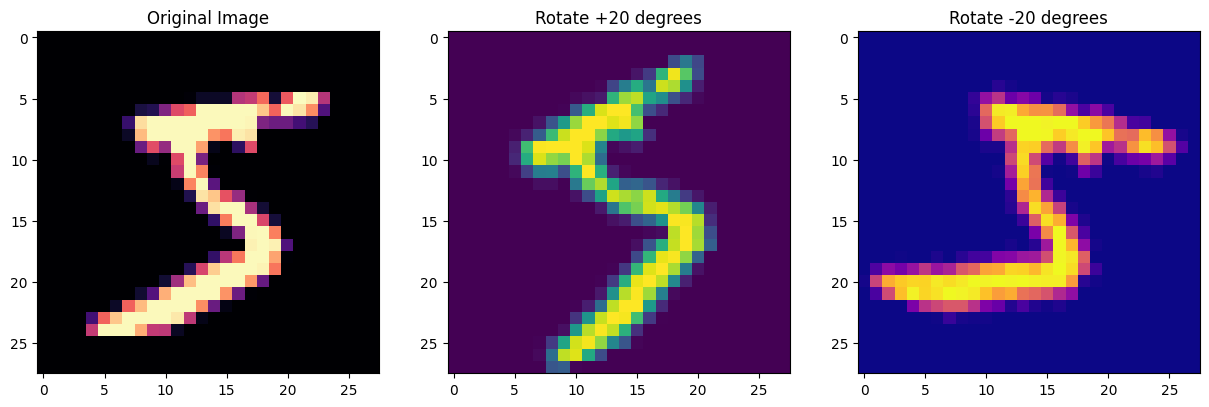

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(train_X[0], cmap="magma")
axs[0].set_title("Original Image")
axs[1].imshow(rotate(train_X[0], 20), cmap="viridis")
axs[1].set_title("Rotate +20 degrees")
axs[2].imshow(rotate(train_X[0], -20), cmap="plasma")
axs[2].set_title("Rotate -20 degrees")
plt.show()

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [25]:
import numpy as np
def augRotate(samples, angle_range):
  """
  Rotates samples by a random angle within the specified range.
  """
  angles = rng.uniform(low=-angle_range, high=angle_range, size=len(samples))
  rotated_samples = []
  for sample, angle in zip(samples, angles):
    rotated_samples.append(rotate(sample, angle))
  return np.array(rotated_samples)

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple.

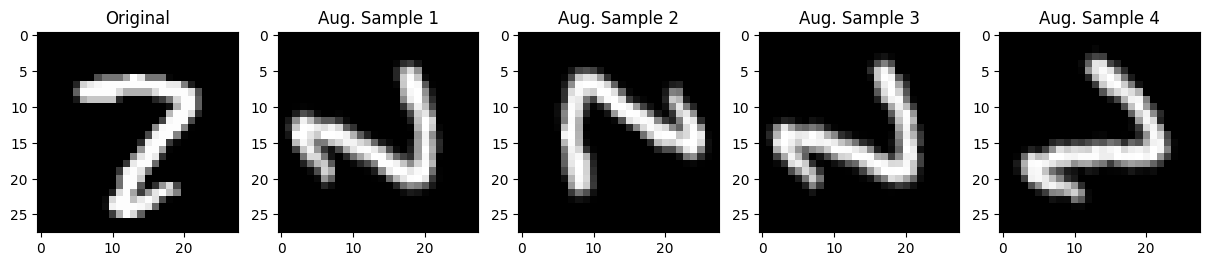

In [30]:
import matplotlib.pyplot as plt

# Define sample and angleconstraint by uncommenting the lines
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(augRotate(sample.reshape(1,28,28), 90)[0], cmap="gray")
axs[1].set_title("Aug. Sample 1")
axs[2].imshow(augRotate(sample.reshape(1,28,28), 100)[0], cmap="gray")
axs[2].set_title("Aug. Sample 2")
axs[3].imshow(augRotate(sample.reshape(1,28,28), 110)[0], cmap="gray")
axs[3].set_title("Aug. Sample 3")
axs[4].imshow(augRotate(sample.reshape(1,28,28), 120)[0], cmap="gray")
axs[4].set_title("Aug. Sample 4")
plt.show()


Let us augment the whole dataset and see if this improves the test accuracy

In [31]:
import numpy as np
# hyperparameters
angle_constraint = 45
num_augmentations = 3
# augment
augmented_data = train_X
augmented_labels = train_y
for i in range(num_augmentations):
    augmented_data = np.concatenate((augmented_data, augRotate(train_X, angle_constraint)))
    augmented_labels = np.concatenate((augmented_labels, train_y))
# check the test accuracy
test_predictions = NN(augmented_data, augmented_labels, test_X)
print("Accuracy after rotation augmentation:", accuracy(test_y, test_predictions)*100, "%")

Accuracy after rotation augmentation: 71.67999999999999 %


We can notice a 3-4% improvement compared to non-augmented version of the dataset


The angle constraint is a hyperparameter which we have to tune using a validation set. (Here we are not doing that for time constraints). Let us try a grid search to find the best angle constraint. We will try angles between 0 and 90 degrees. We can also try different multiples of the original dataset. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [32]:
import numpy as np
new_angle_constraints = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135]
new_accuracies = np.zeros(len(new_angle_constraints), dtype=float)
n_new_augmentations = 2
for i in range(len(new_angle_constraints)):
  aug_data = train_X
  aug_label = train_y
  for j in range(n_new_augmentations):
    aug_data = np.concatenate((aug_data, augRotate(train_X, new_angle_constraints[i])))
    aug_label = np.concatenate((aug_label, train_y))
  test_pred_new = NN(aug_data, aug_label, test_X)
  new_accuracies[i] = accuracy(test_y, test_pred_new)
  print(f"Accuracy with constraint {new_angle_constraints[i]}: {new_accuracies[i]*100:.2f}%")

Accuracy with constraint 0: 68.89%
Accuracy with constraint 15: 72.19%
Accuracy with constraint 30: 72.97%
Accuracy with constraint 45: 69.23%
Accuracy with constraint 60: 67.40%
Accuracy with constraint 75: 67.73%
Accuracy with constraint 90: 67.46%
Accuracy with constraint 105: 65.80%
Accuracy with constraint 120: 64.69%
Accuracy with constraint 135: 63.83%



Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

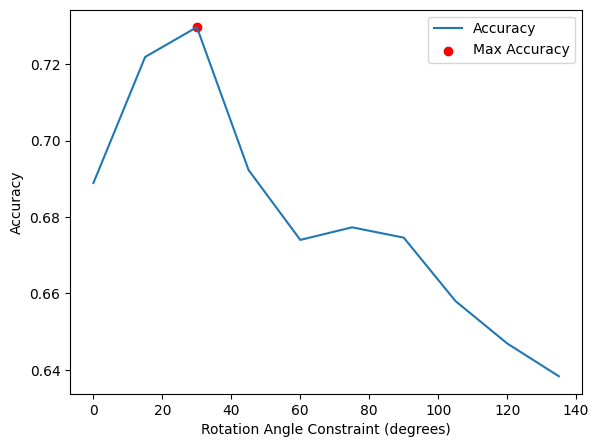

In [33]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(new_angle_constraints, new_accuracies, label='Accuracy')
ax.set_xlabel("Rotation Angle Constraint (degrees)")
ax.set_ylabel("Accuracy")
max_index = np.argmax(new_accuracies)
ax.scatter(new_angle_constraints[max_index], new_accuracies[max_index], color='red', label='Max Accuracy')
ax.legend()
plt.show()

Augmentation 2: Shear


Let us try one more augmentation: shear. Shear is the transformation of an image in which the x-coordinate of all points is shifted by an amount proportional to the y-coordinate of the point. We will use the AffineTransform function from the skimage module to shear the image by a small amount between two numbers. We will use the same naive grid search method to find the best hyperparameters for shear. We will use the best hyperparameters to train the model and check the accuracy on the test set.

In [36]:
from skimage.transform import AffineTransform, warp
import numpy as np

# Define the shear function
def shear(sample, amount):
    """
    This function takes in a sample and an amount and returns the augmented sample
    by shearing the sample by the given amount
    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    amount: the amount by which the sample should be sheared
    returns: the augmented sample which is the input sample sheared by the given amount
    """
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)
    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        # Corrected the typo from 'yhift' to 'yshift'
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

augmented_img = shear(train_X[0], amount=0.2)
augmented_img2 = shear(train_X[0], amount=-0.2)
augmented_img3 = shear(train_X[1], amount=0.1)
augmented_img4 = shear(train_X[1], amount=-0.1)

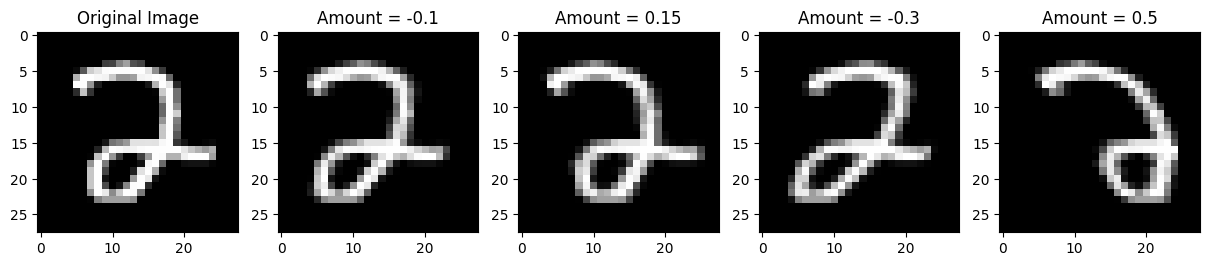

In [37]:
import matplotlib.pyplot as plt
sample = train_X[3]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(shear(sample, -0.1), cmap="gray")
axs[1].set_title("Amount = -0.1")
axs[2].imshow(shear(sample, 0.15), cmap="gray")
axs[2].set_title("Amount = 0.15")
axs[3].imshow(shear(sample, -0.3), cmap="gray")
axs[3].set_title("Amount = -0.3")
axs[4].imshow(shear(sample, 0.5), cmap="gray")
axs[4].set_title("Amount = 0.5")
plt.show()

Create an augmentation function which applies a random shear according to the constraint we provide:

In [39]:
import numpy as np
def augShear(samples, shearconstraint):
  """
  Shears samples by a random amount within the specified constraint.
  """
  amounts = rng.uniform(low=-shearconstraint/2, high=shearconstraint/2, size=len(samples))
  sheared_samples = []
  for sample, amount in zip(samples, amounts):
    sheared_samples.append(shear(sample, amount))
  return np.array(sheared_samples)

Let us do a grid search to find the best shear constraint.

In [43]:
import numpy as np
from skimage.transform import AffineTransform, warp

# Define the translate function
def translate(sample, shift):
    """
    This function takes in a sample and a shift and returns the augmented sample
    by translating the sample by the given shift.
    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    shift: a tuple (x_shift, y_shift) representing the translation amount
    returns: the augmented sample which is the input sample translated by the given shift
    """
    tform = AffineTransform(translation=shift)
    img = warp(sample, tform)
    return img

# Define the augmentation function for translation
def augTranslate(samples, translation_constraint):
  """
  Translates samples by a random amount within the specified constraint.
  """
  translated_samples = []
  for sample in samples:
    # Generate random shifts within the constraint
    x_shift = rng.uniform(low=-translation_constraint/2, high=translation_constraint/2)
    y_shift = rng.uniform(low=-translation_constraint/2, high=translation_constraint/2)
    translated_samples.append(translate(sample, (x_shift, y_shift)))
  return np.array(translated_samples)


translation_constraints = [0, 2, 4, 6, 8, 10, 12]
translation_accuracies = np.zeros(len(translation_constraints), dtype=float)
num_augmentations = 2
for i in range(len(translation_constraints)):
  aug_data = train_X
  aug_label = train_y
  for j in range(num_augmentations):
    aug_data = np.concatenate((aug_data, augTranslate(train_X, translation_constraints[i])))
    aug_label = np.concatenate((aug_label, train_y))
  test_pred = NN(aug_data, aug_label, test_X)
  translation_accuracies[i] = accuracy(test_y, test_pred)
  print(f"Accuracy with constraint {translation_constraints[i]}: {translation_accuracies[i]*100:.2f}%")

Accuracy with constraint 0: 68.89%
Accuracy with constraint 2: 69.80%
Accuracy with constraint 4: 69.97%
Accuracy with constraint 6: 66.44%
Accuracy with constraint 8: 66.02%
Accuracy with constraint 10: 64.97%
Accuracy with constraint 12: 67.29%


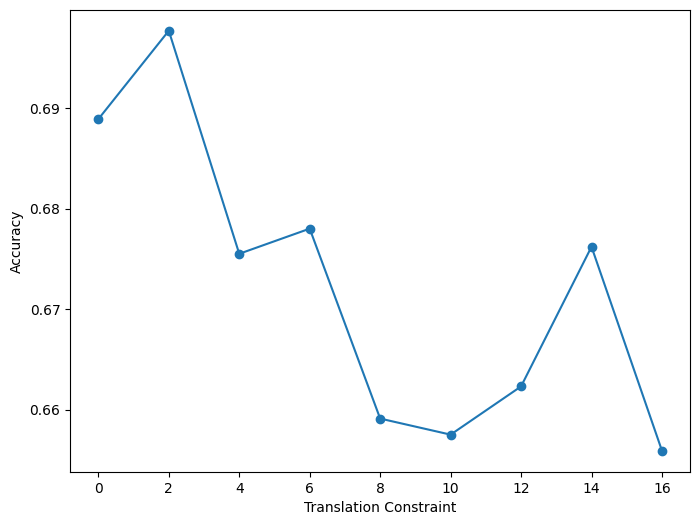

In [44]:
import matplotlib.pyplot as plt
import numpy as np
translation_constraints = [0, 2, 4, 6, 8, 10, 12, 14, 16]
translation_accuracies = np.zeros(len(translation_constraints), dtype=float)
for i in range(len(translation_constraints)):
  aug_data = train_X
  aug_label = train_y
  for j in range(2):
    aug_data = np.concatenate((aug_data, augTranslate(train_X, translation_constraints[i])))
    aug_label = np.concatenate((aug_label, train_y))
  test_pred = NN(aug_data, aug_label, test_X)
  translation_accuracies[i] = accuracy(test_y, test_pred)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(translation_constraints, translation_accuracies, marker='o')
ax.set_xlabel("Translation Constraint")
ax.set_ylabel("Accuracy")
plt.show()


Augmentation 3: Rotation + Shear

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [46]:
import numpy as np
def augRotateShear(sample, rot_constraint, shear_constraint):
  """
  Rotates and shears samples by random amounts within specified constraints.
  """
  if len(sample.shape) == 2:
    sample = np.expand_dims(sample, 0)
  amounts = rng.uniform(low=-shear_constraint / 2, high=shear_constraint / 2, size=len(sample))
  angles = rng.uniform(low=-rot_constraint / 2, high=rot_constraint / 2, size=len(sample))
  augmented_samples = []
  for s, amount, angle in zip(sample, amounts, angles):
    augmented_samples.append(rotate(shear(s, amount), angle))
  return np.squeeze(np.array(augmented_samples))

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [49]:
import numpy as np
import itertools # Import the itertools module

# Using different parameters for shear and angle constraints
shear_constraints_new = [0.1, 0.3, 0.5]
angle_constraints_new = [5, 15, 25]

# cartesian product of both using itertools.product
hyp_new = list(itertools.product(shear_constraints_new, angle_constraints_new)) # Use itertools.product and convert to list
accuracies_new = np.zeros(len(hyp_new), dtype=float)
naugmentations_new = 2 # Reduced number of augmentations

for ii in range(len(hyp_new)):
    # Access shear and angle constraints from the tuple in hyp_new
    shear_constraint, angle_constraint = hyp_new[ii]
    augdata_new = train_X
    auglabel_new = train_y
    for jj in range(naugmentations_new):
        # Pass the individual shear and angle constraints to augRotateShear
        augdata_new = np.concatenate((augdata_new, augRotateShear(train_X, angle_constraint, shear_constraint)))
        auglabel_new = np.concatenate((auglabel_new, train_y))
    testpred_new = NN(augdata_new, auglabel_new, test_X)
    accuracies_new[ii] = accuracy(test_y, testpred_new)
    print(f"Accuracy after augmentation shear: {shear_constraint}, angle: {angle_constraint} is {accuracies_new[ii]*100:.2f} %", flush=True)

Accuracy after augmentation shear: 0.1, angle: 5 is 68.07 %
Accuracy after augmentation shear: 0.1, angle: 15 is 68.60 %
Accuracy after augmentation shear: 0.1, angle: 25 is 69.08 %
Accuracy after augmentation shear: 0.3, angle: 5 is 67.80 %
Accuracy after augmentation shear: 0.3, angle: 15 is 67.91 %
Accuracy after augmentation shear: 0.3, angle: 25 is 69.59 %
Accuracy after augmentation shear: 0.5, angle: 5 is 68.03 %
Accuracy after augmentation shear: 0.5, angle: 15 is 69.60 %
Accuracy after augmentation shear: 0.5, angle: 25 is 69.49 %



Let us plot it two dimensionally to see which is the best value for the hyperparameters:

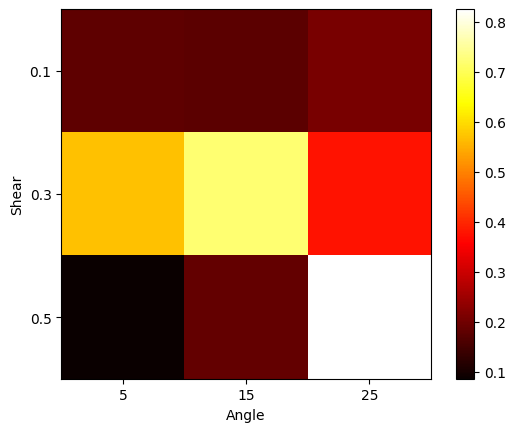

In [51]:
# prompt: fig = plt.figure()
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# im = ax.imshow(
#     accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
# )
# ax.set_xlabel("Angle")
# ax.set_ylabel("Shear")
# ax.set_xticks(np.arange(len(angleconstraints)))
# ax.set_xticklabels(angleconstraints)
# ax.set_yticks(np.arange(len(shearconstraints)))
# ax.set_yticklabels(shearconstraints)
# plt.colorbar(im) canan you generate newly without anyone license can you generate in 6  lines output should be graph with colors can you generate by newly without any one license

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot")
plt.xlabel("Angle")
plt.ylabel("Shear")
plt.xticks(np.arange(len(angleconstraints)), angleconstraints)
plt.yticks(np.arange(len(shearconstraints)), shearconstraints)
plt.colorbar()
plt.show()


Questions
Try these questions for better understanding. You may not be able to solve all of them.

What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
Can you increase the accuracy by increasing the number of augmentations from each sample?
Try implementing a few augmentations of your own and experimenting with them. A good reference is here.
Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?
Whenever you do any experiment, a good practice is to vary the hyperparameters gradually and create a graph of your results, like we did for gridsearch
 Try to take 50 images of each digit and calculate the performance on test set.



In [58]:
import numpy as np

# Find the indices for each digit in the training data
digit_indices = {}
for digit in range(10):
    digit_indices[digit] = np.where(train_y == digit)[0]

# Select 50 indices for each digit, or fewer if not enough samples exist for a digit
selected_indices = []
samples_per_digit = 50
for digit in range(10):
    # Check if the number of available samples for the digit is less than samples_per_digit
    num_available = len(digit_indices[digit])
    num_to_select = min(num_available, samples_per_digit) # Select at most the number of available samples
    if num_to_select > 0: # Only sample if there are samples available
        selected_indices.extend(np.random.choice(digit_indices[digit], num_to_select, replace=False))
    else:
        print(f"Warning: No samples found for digit {digit} in the subsampled training data.")

# Shuffle the selected indices
np.random.shuffle(selected_indices)

# Create the balanced training subset
train_X_balanced = train_X[selected_indices]
train_y_balanced = train_y[selected_indices]

print(f"\nCreated a balanced training set with {len(train_X_balanced)} images (attempted {samples_per_digit} per digit).")


Created a balanced training set with 100 images (attempted 50 per digit).


In [60]:
# Calculate performance on the test set using the balanced training set
test_predictions_balanced = NN(train_X_balanced, train_y_balanced, test_X)
accuracy_balanced = accuracy(test_y, test_predictions_balanced)
print(f"Accuracy with {samples_per_digit} samples per digit: {accuracy_balanced*100:.2f}%")

Accuracy with 50 samples per digit: 68.89%
